# Fighting COVID 19 by best prioritizing the most important research articles (through their abstracts) in the cord19 dataset: https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=document_parses
by
1. Understanding the most prevalent topics
2. Assessing the coherence of the topics
3. Augmenting each of these articles abstracts with our engineeed feature : nbQuotations in the adLabels.py script that will tell how many times an article has been cited and thus how popular it might be

# Loading the abstracts

In [1]:
import pandas as pd
papers = pd.read_csv("C:/projects/machineLearning/hecCourse/metadataWithQuotationLabels.csv", usecols=['title', 
                                                                                                      'abstract', 
                                                                                                      'publish_time', 
                                                                                                      'authors', 
                                                                                                      'year',  
                                                                                                      'refid',
                                                                                                      'nbQuotations', 
                                                                                                      'references', 
                                                                                                      'cord_uid'])

# Data Cleaning

In [3]:
# only keep rows with abstracts
papers = papers[(-papers['abstract'].isnull())]

In [4]:
# Print out the first rows of papers
papers.head(10)

,title,abstract,publish_time,authors,year,refid,nbQuotations,references,cord_uid
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,2001-07-04,"['Tariq Madani', 'Aisha Al-Ghamdi']",2001,e42913cac3c0d5928daf4caaa79344f211c4931a,0,"['f2fe40ada93fc07d2081a490526965c9c2f4aa83', '...",ug7v899j
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,2000-08-15,"['Albert Van Der Vliet', 'Jason Eiserich', 'Ca...",2000,ac7df3f639b04e42c30669407316b15bc6d8cd29,2,"['428d90108d5f8219688019c79b9254bf635fc492', '...",02tnwd4m
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,2000-08-25,['Erika Crouch'],2000,860288794d05ef11f7070d68a3410044bd3f4ae0,12,"['95f330d726130c1d354cc5a2378458dbe5bd415c', '...",ejv2xln0
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,[],2001,ec0561181c3983013e41829469d530b37708ed41,6,"['23bd4084bdd542298bac116d053069477df97546', '...",2b73a28n
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"['Joseph Domachowske', 'Cynthia Bonville', 'He...",2001,014e4630f53cc693e6f88c78ac20413cdb33675a,4,"['abf97aa523dbea9b209167ba329521488a09a044', '...",9785vg6d
5,Sequence requirements for RNA strand transfer ...,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"['Alexander Pasternak', 'Erwin Van Den Born', ...",2001,7890bdcde2bc48da8b35296ee38c3aa6e6a549c5,82,"['63f53cf95376af6f781ae6c60df4887012432de5', '...",zjufx4fo
6,Debate: Transfusing to normal haemoglobin leve...,Recent evidence suggests that critically ill p...,2001-03-08,"['Gonzalo Alvarez', 'Paul Hébert', 'Sharyn Szi...",2001,51a23a90f8f9256eb9bc071f61f7e438445e5209,0,"['edeaa18167dce4082687c7f4db57b8544fa40177', '...",5yhe786e
7,The 21st International Symposium on Intensive ...,The 21st International Symposium on Intensive ...,2001-05-02,"['Jonathan Ball', 'Richard Venn']",2001,6e99b0fce69b3267232d8e6305f750a46d442f01,0,"['8113a005cbb4512bb9bde651a31541ab5cf0bab9', '...",8zchiykl
8,Heme oxygenase-1 and carbon monoxide in pulmon...,"Heme oxygenase-1 (HO-1), an inducible stress p...",2003-08-07,"['Dirk-Jan Slebos', 'Stefan Ryter', 'Augustine...",2003,3b810bfc5a904db93408c81428b78503f2d52bda,0,"['6269014eb5339b7e6b33d863dd5cea166ff9276d', '...",8qnrcgnk
9,Technical Description of RODS: A Real-time Pub...,This report describes the design and implement...,2003-09-01,"['Fu-Chiang Tsui', 'Jeremy Espino', 'Virginia ...",2003,46f633948764f677d7bf6789e737a1ee43b30407,42,"['9b9f2750ee66b494bb7df26807204bdd89071a78', '...",jg13scgo


In [7]:
nbNull = sum(papers['abstract'].isnull())
print(f'Number of rows with no abstract is {nbNull}')

Number of rows with no abstract is 0


In [89]:
nbAbstracts = len(papers['abstract'])
print(nbAbstracts)

85418
C:\Users\franc\.virtualenvs\machineLearningProject-YX0hXYec\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Removing accents, punctuation, lower casing

In [8]:
# removing first the accents

import unidecode

def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text


papers['abstract'] = papers.apply(lambda x: remove_accented_chars(x['abstract']), axis=1)
print("The potential accents have been removed from the abtracts")

The potential accents have been removed from the abtracts


In [9]:
# Removing punctuation and lower casing

# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = papers['abstract'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())

print('The punctuation and lower casing have been removed from the abstracts for better analysis')

The punctuation and lower casing have been removed from the abstracts for better analysis


In [11]:
# Print out the first rows of papers

print('Below you may find the very first cleaned abstracts')
papers['paper_text_processed'].head()

Below you may find the very first abstracts


0    objective: this retrospective chart review des...
1    inflammatory diseases of the respiratory tract...
2    surfactant protein-d (sp-d) participates in th...
3    endothelin-1 (et-1) is a 21 amino acid peptide...
4    respiratory syncytial virus (rsv) and pneumoni...
Name: paper_text_processed, dtype: object

## Exploratory Analysis
To verify whether the preprocessing happened correctly, we’ll make a word cloud using the wordcloud package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.

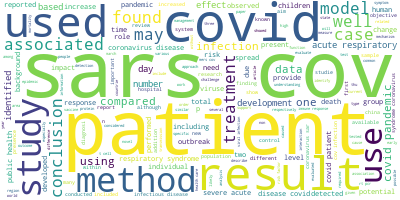

In [12]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [17]:
frequencyOfWords = WordCloud().process_text(''.join(list(papers['paper_text_processed'].values)))

In [40]:
import numpy as np
veryFrequentOccurence = np.percentile(sorted(list(frequencyOfWords.values())), 99.7) # the words that are in the 99.8% centile
print(veryFrequentOccurence)

1204.2000000000698


Let us identify the words that are so frequent that they are in the 99.8% --> stopwords and then we could consider removing them

In [50]:
potentialStopWords = {k:v for (k,v) in frequencyOfWords.items() if v > veryFrequentOccurence}
potentialStopWordsDf= pd.DataFrame.from_dict(potentialStopWords, orient='index', columns=['potentialStopWords'])
potentialStopWordsDf

,potentialStopWords
objective,4574
review,6337
epidemiology,1534
clinical,2448
hospital,6786
...,...
covid patient,7190
covid case,2655
coronavirus sar,5644
clinical characteristic,1215


## keep the list of potential stopwords in a csv for analysis

In [54]:
potentialStopWordsDf.reset_index().to_csv('C:/projects/machineLearning/hecCourse/potentialStopWords.csv', encoding='utf-8', index=False)
print('The csv of potential stop words has been saved')

The csv of potential stop words has been saved


# Observations : StopWords
StopWords are words that are not very meaningful and that will not help us derive a meaningul topic. They tend to blur meaning across the topics. Thus they need to be removed
The following is a list of stop words we will add to a predefined corpus of stop words that we get get and download from the nltk package in python:
- use
- used
- associated
- identified
- using
- conclusion
- well
- objective
- positive
- meaning
- identified
- common
- predefined
- year
- three
- likely
- non
- study
- etc...
- We created a csv of the stop words we are going to remove --> took around 45 min to keep only non relevant relevant words aka stopwords. We will use when training our LDA model

## Prepare text for LDA analysis
1. We will transfporm the textual data in a format that will serve as an input for training the LDA model
2. Documents into vector representation (Bag Of Words --> BOW)


## adding te stop words found

In [71]:
stopWords = pd.read_csv("C:/projects/machineLearning/hecCourse/stopWords.csv", usecols=['index'])
stopWords = list(stopWords['index'])
print(f'{len(stopWords)} stop words have been identified')

142 stop words have been identified


## Adding our additional stop words

In [72]:
# justification for adding stop words : https://bugsdb.com/_en/debug/065099ad76582c0c0785b319063c6f83
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS.union(stopWords)

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


In [74]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import TfidfTransformer 
# Définir le stemmer :
stemmer = SnowballStemmer('english')
# Ajouter un stemmer à la fonction "CountVectorizer" :
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

# 1- Initialiser la fonction StemmedCountVectorizer 
scv = StemmedCountVectorizer(strip_accents = 'ascii'# Retirer les accents sur les lettres
                             ,lowercase = True      # Retirer les majuscules 
                             ,stop_words='english'  # Retirer les STOPWORDS à aprtir d'une liste
                             ,analyzer='word'
                             #,min_df=2  # Élimine les mots qui apparaissent dans moins de 2 documents
                             ,max_df=0.70  # Élimine les mots qui apparaissent dans plus de 75% des documents
                             )

# 2- Créer la matrice "count_matrix" avec le décompte de chaque mot par document
count_matrix = scv.fit_transform(papers['paper_text_processed'])

# 3- Initialiser le transformer TF-IDF (Transform a count matrix to a normalized tf or tf-idf representation)
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True) 

# 4- Calcul des valeurs IDF:
tfidf_transformer.fit(count_matrix)

# 4- Créer la matrice de score TF-IDF
tfidf_matrix = tfidf_transformer.transform(count_matrix)



## Visualizing the most 10 common words from the regular Bag of Words Word Matrix


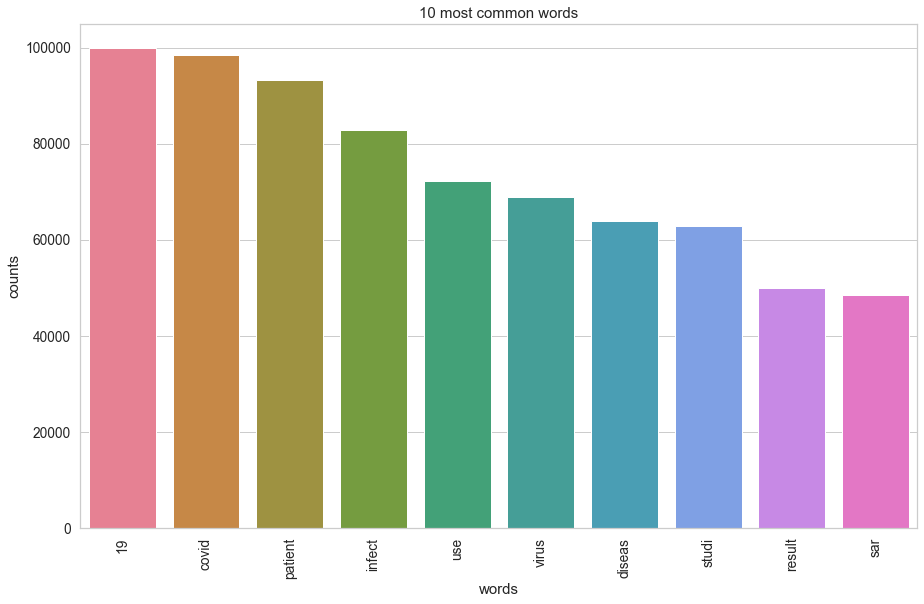

In [75]:
# Visualise the 10 most common words
plot_10_most_common_words(count_matrix, scv)

## Visualizing the most 10 common words from the TF-IDF Word Matrix

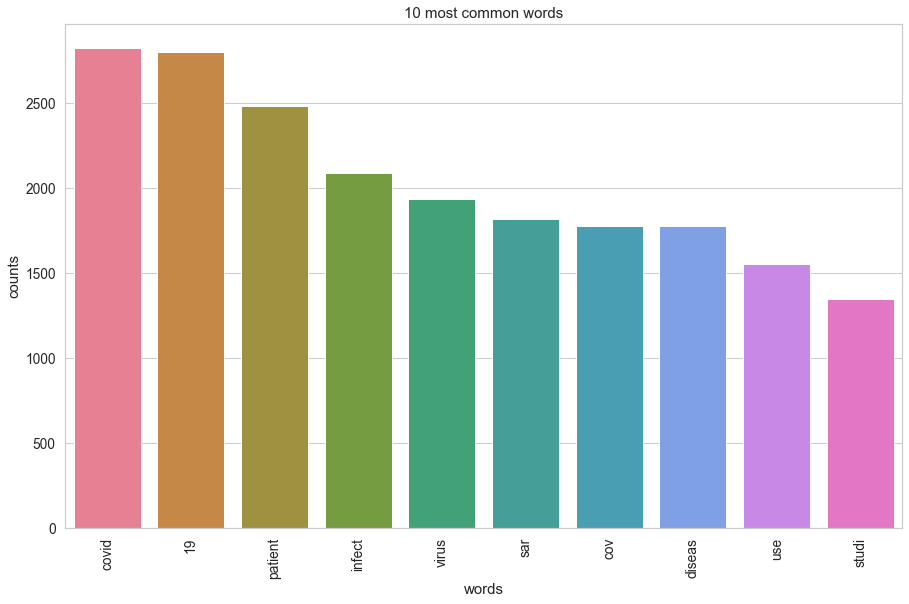

In [76]:
# Visualise the 10 most common words
plot_10_most_common_words(tfidf_matrix, scv)

# Let us now train our very first LDA model (on the TF-IDF matrix) + LDA Modelling Results Visualization

In [77]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(tfidf_matrix)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, scv, number_words)

Topics found via LDA:

Topic #0:
bat ace2 pedv strain cat cov mer ibv camel sequenc

Topic #1:
patient covid 19 95 ci cov sar hospit test symptom

Topic #2:
patient 19 covid respiratori infect sever diseas clinic pneumonia acut

Topic #3:
virus cell protein viral infect cov sar immun vaccin rna

Topic #4:
covid 19 health pandem model diseas use case data public


# Here we have chosen 5 topics but it could have been a different number --> we do not really know the optimal number of topics and this will be part of our next investigation

## Analyzing the LDA Model results
1. Let us visualize the topics for interpretability
2. We will use a dedicated python package for visualization of topics --> pyLDAvis

It will help us:

1. Better understand and interpret individual topics, and
2. Better understand the relationships between the topics.

A relevance metric based on a combination of frequency of the topic across the distribution and an aspect of exclusivity to make the topic "pure" is made available by the creator of the pyLDAvis package and after a study they recommended to use a relevance matrix of 0.4 

Link to the original paper explaining it is here: https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf

An overview of how to use pyLDAvis is here: https://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb



In [87]:
%%time
viz = True
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))

if viz:
    LDAvis_prepared = sklearn_lda.prepare(lda, tfidf_matrix, scv)
    pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

C:\Users\franc\.virtualenvs\machineLearningProject-YX0hXYec\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Wall time: 17.5 s


In [88]:
pyLDAvis.sklearn.prepare(lda, tfidf_matrix, scv)

C:\Users\franc\.virtualenvs\machineLearningProject-YX0hXYec\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.176296  0.016241       1        1  39.900402
3      0.005648  0.146977       2        1  26.422894
2     -0.029423 -0.055505       3        1  19.727973
1      0.008609 -0.114973       4        1   9.865091
0      0.191462  0.007259       5        1   4.083641, topic_info=               Term         Freq        Total Category  logprob  loglift
101279      patient  1964.000000  1964.000000  Default  30.0000  30.0000
38484          cell  1120.000000  1120.000000  Default  29.0000  29.0000
43630         covid  2298.000000  2298.000000  Default  28.0000  28.0000
7361             19  2279.000000  2279.000000  Default  27.0000  27.0000
108389      protein   877.000000   877.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
62582         genom    26.636571   421.054246   Topic5  -6.7799   0.4377
136680        virus    31.869998  1603.601126   Topic5  -6.6006  -0.7202
117407          sar    28.062370  1467.331902   Topic5  -6.7278  -0.7586
133539      unknown    21.199958   146.944986   Topic5  -7.0082   1.2621
43170   coronavirus    21.308030  1004.312680   Topic5  -7.0031  -0.6548

[460 rows x 6 columns], token_table=        Topic      Freq  Term
term                         
52          1  0.115191  0001
52          2  0.006776  0001
52          3  0.440436  0001
52          4  0.440436  0001
7361        1  0.567639    19
...       ...       ...   ...
140121      3  0.387031  year
140121      4  0.165595  year
140121      5  0.001926  year
140847      2  0.991807  zikv
141095      3  0.994744    zu

[1087 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 2, 1])